<a href="https://colab.research.google.com/github/dlehgus0124/pyTorch/blob/main/lossAndOptim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loss function에 대한 이해
#2 MNIST를 활용한 파이토치 예제코드 참조

In [ ]:
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1, 28*28)).cuda()
    labels = Variable(labels).cuda()

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward()
    optimizer.step()

    if(i+1) % 100 == 0 :
      print("Epoch [%d/%d], step [%d/%d], Loss: %.4f"
      %(
          epoch+1, num_epochs, i+1, len(train_data) // batch_size,
          loss.data
      ))

1. loss : 예측치와 실제값 간의 차이(손실)
2. backward함수 : 가중치를 얼마나 적용을 해야할지 정해주는 함수

* 머신러닝은 예측값과 실제값이 다를 경우 같아지도록 유도를 해야한다.
* 만약 둘의 값이 같은 경우에는 예측하는 과정을 유지하도록 하게 해줘야한다.

- 그 기준을 loss값으로 정한다. 0이랑 loss의 값이 가까울 수록 정답값에 가깝다고 할 수 있다. loss값을  minimize하는게 최종 목표이다.  

CrossEntropyLoss : 가능한 후보군에서 예측 된 확률 분포가 실제 분포와 얼마나 가까운지를 나타내며, CrossEntropyLoss값을 최소화 시키는 것이 모델 학습의 목표이다.

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = lr)

간단한 sample code

In [1]:
import torch
import torch.nn as nn

In [5]:
loss_function = nn.CrossEntropyLoss()

In [6]:
# MNIST의 출력값을 샘플로 나타낸 코드
loss = loss_function(torch.tensor([[
    0.8982,
    0.805,
    0.6393,
    0.9983,
    0.5731,
    0.0469,
    0.556,
    0.1476,
    1.2404,
    0.5544
]]), torch.LongTensor([3])) # 정답값은 3이다.
loss.item()

2.0085251331329346

In [8]:
loss = loss_function(torch.tensor([[
    3e-8,
    5e-5,
    1e-6,
    2.4204,
    2e-5,
    3e-5,
    5e-4,
    5e-5,
    6e-4,
    5e-4
]]), torch.LongTensor([3]))
loss.item()

0.5878590941429138

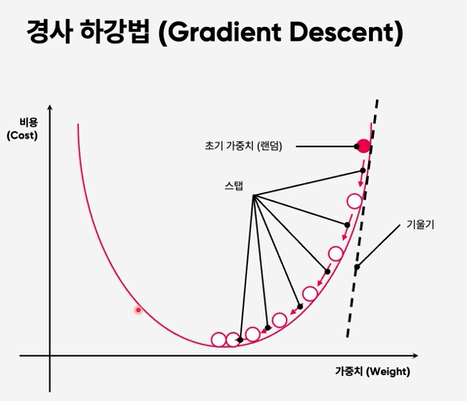

- 경사 하강법 : 최적화된 지점까지 이동하는 과정이라고 할 수 있다.
- loss값이 클수록 패널티를 크게 준다

경사 하강법은 패널티의 값이 커질수록 step의 보폭이 점점 커진다.